In [70]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn-white')
import seaborn as sns
sns.set()

In [71]:
df_normal_list = []
pathlist = Path("/home/aggelos-i3/Downloads/simu Elbas/7h33NO").glob(
    '**/*.xls')
for path in pathlist:
    # because path is object not string
    path_in_str = str(path)
    df = pd.read_csv(path_in_str, delimiter='\t')
    df = df[['loc. (actual) [km]', 'voltage [V]']]
    #df = df.set_index("loc. (actual) [km]")
    df.sort_index(inplace=True)
    df_normal_list.append(df)

In [72]:
df_error_list = []
pathlist = Path("/home/aggelos-i3/Downloads/simu Elbas/7h33D1").glob(
    '**/*.xls')
for path in pathlist:
    # because path is object not string
    path_in_str = str(path)
    df = pd.read_csv(path_in_str, delimiter='\t')
    df = df[['loc. (actual) [km]', 'voltage [V]']]
    #df = df.set_index("loc. (actual) [km]")
    df.sort_index(inplace=True)
    df_error_list.append(df)

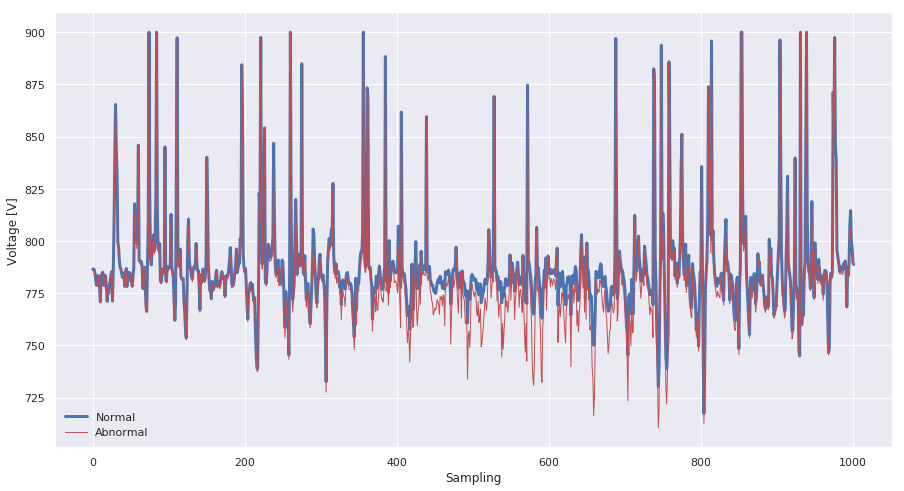

In [73]:
plt.figure(figsize=(15, 8))
plt.plot(df_normal_list[0]['voltage [V]'], label='Normal', linewidth=3.0)
plt.plot(df_error_list[0]['voltage [V]'], label='Abnormal', c='r', linewidth=1)
plt.xlabel("Sampling")
plt.ylabel("Voltage [V]")
plt.legend(loc='best')

In [74]:
roll_thres_list = list()
for df in df_normal_list:
    # suppose that we set our threshold at mean - 2*std
    window = 50
    rolling_thres = df['voltage [V]'].rolling(window=window).mean(
    ) - 3 * df['voltage [V]'].rolling(window=window).std()
    roll_thres_list.append(rolling_thres)

In [75]:
avg_thresh = np.zeros(1000)
for i in range(1000):
    for thres in roll_thres_list:
        avg_thresh[i] += thres.iloc[i]
avg_thresh = avg_thresh / 20

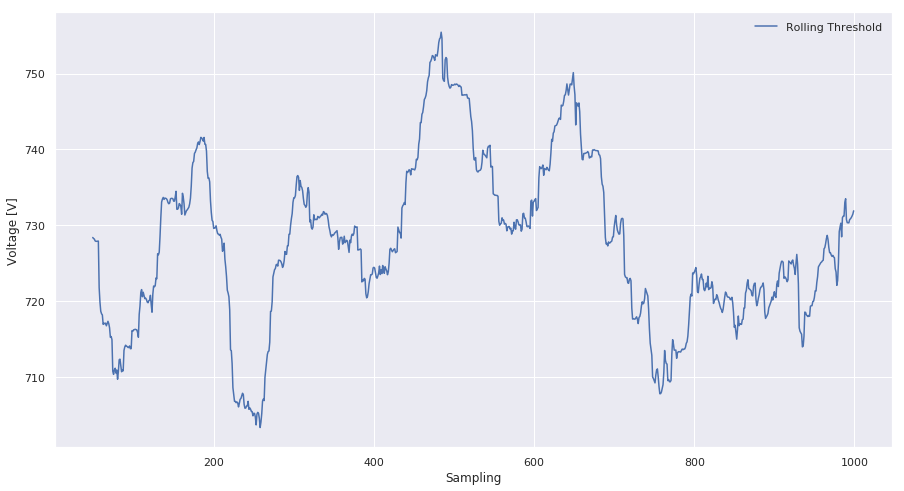

In [76]:
plt.figure(figsize=(15, 8))
plt.plot(avg_thresh, label="Rolling Threshold")
rolling_thres_abnormal = df_error_list[0]['voltage [V]'].rolling(
    window=window).mean() - 3 * df_error_list[0]['voltage [V]'].rolling(
        window=window).std()
plt.xlabel("Sampling")
plt.ylabel("Voltage [V]")
plt.legend(loc='best')

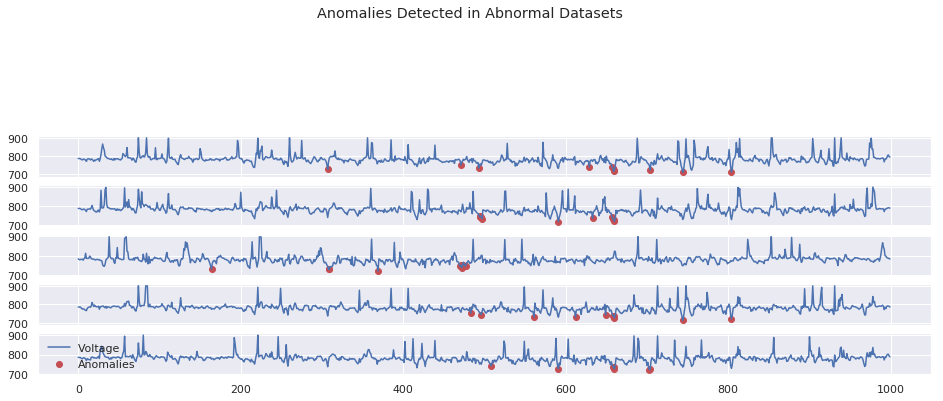

In [77]:
plt.figure(figsize=(16, 18))
plt.suptitle("Anomalies Detected in Abnormal Datasets")
i = 0

for df in df_error_list[0:10:2]:
    plt.subplot(20, 1, i + 1)

    error = df['voltage [V]'][:1000] < avg_thresh
    plt.plot(df['voltage [V]'][:1000], label='Voltage')
    plt.scatter(range(1000),
                np.where(error, df['voltage [V]'][:1000], None),
                c='r',
                label='Anomalies')

    i += 1
plt.legend(loc='best')


Text(0.5, 0.98, 'Anomalies Detected in Normal Datasets')

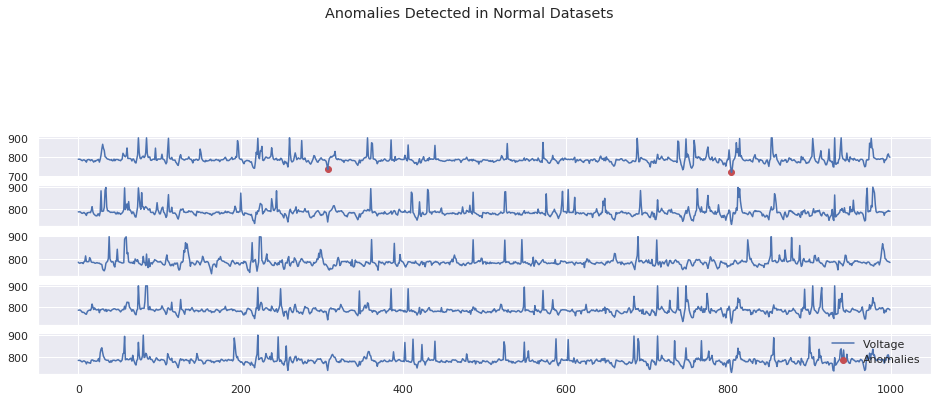

In [78]:
plt.figure(figsize=(16, 18))
i = 0
for df in df_normal_list[0:10:2]:
    plt.subplot(20, 1, i + 1)
    error = df['voltage [V]'][:1000] < avg_thresh
    plt.plot(df['voltage [V]'][:1000], label='Voltage')
    plt.scatter(range(1000),
                np.where(error, df['voltage [V]'][:1000], None),
                c='r',
                label='Anomalies')

    i += 1
plt.legend(loc='best')
plt.suptitle("Anomalies Detected in Normal Datasets")
